# Assignment 3: Word2Vec

In this assignment, we will see how we can use Word2Vec (or any similar word embedding) to use information from unlabelled data to help us classify better!

You will be using the sentiment data from last week, either the yelps or movies, whichever you wish. 

Your goal will be to simulate the following situation: you have a **small** set of labelled data and a large set of unlabelled data. Show how the two follow 2 techniques compare as the amount of labelled data increases. You should train them on the small labelled subset and test their performance on the rest of the data. 

In other words, train on 1k, test on 99k. Then train on 2k, test on 98k. Then train on 4k, test on 96k. Etc.

1. Logistic regression trained on labelled data, documents represented as term-frequency matrix of your choice. You can learn the vocabulary from the entire dataset or only the labelled data.

2. Logistic regression trained on the labelled data, documents represented as word2vec vectors where you train word2vec using the entire dataset. Play around with different settings of word2vec (training window size, K-negative, skip-gram vs BOW, training windows, etc.). Note: we didn't go over the options in detail in class, so you will need to read about them a bit!

You can read about the gensime word2vec implementation [here](https://radimrehurek.com/gensim/models/word2vec.html).

In [1]:
import numpy as np
import pandas as pd
import re
import spacy
import cython
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
movies = pd.read_csv('movies.csv')
movies = movies[movies['positive'] != 'positive']
movies['positive'] = movies['positive'].replace({'True': 1, 'False': 0})

In [0]:
def data_prep(docs):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    documents = []
    # Prepare data
    for d in docs:
        document = d.lower()
        document = re.sub("[.,?]","", document)
        document = re.sub('"', "", document)
        document = document.split()
        document = [word for word in document if word not in stop_words]
        document = [lemmatizer.lemmatize(word) for word in document]
        documents.append(document)
    return(documents)

def technique_1(train_percentage):
    
    vectorizer = TfidfVectorizer(stop_words='english',
                                 use_idf=False, norm=False)
    
    X = vectorizer.fit_transform(list(movies.text[0:10000]))
    
    X = np.asarray(X.todense())
    Y = np.array(movies['positive'][0:10000])
    
    train_size = int(len(X) * train_percentage)
    Xtrain = X[0:train_size]
    Ytrain = Y[0:train_size]
    Xtest = X[train_size:]
    Ytest = Y[train_size:]
    
    clf = LogisticRegression(solver='newton-cg')
    clf.fit(Xtrain,Ytrain)
    preds = clf.predict(Xtest)
    err = abs((np.sum(Ytest - preds))/len(Ytest))
    
    return err

def technique_2(train_percentage):

    model = Word2Vec(X_preprocess, size=100, min_count=2, workers=4)
    reviews_wvs = []
    for review in X_preprocess:
        review_wv = []
        for word in review:
            try:
                wv = model.wv[word]
                review_wv.append(wv)
            except:
                "word 'word' not in vocabulary"
        reviews_wvs.append(np.array(review_wv))
    reviews_wvs = np.array(reviews_wvs)
  
    final_wvs = []
    for wvs in reviews_wvs:
        wvs = np.sum(wvs, axis=0)/np.linalg.norm(wvs)
        final_wvs.append(wvs)
    final_wvs = np.array(final_wvs)
  
    train_size = int(len(final_wvs) * train_percentage)
    Xtrain = final_wvs[0:train_size]
    Ytrain = Y[0:train_size]
    Xtest = final_wvs[train_size:]
    Ytest = Y[train_size:]
  
    clf = LogisticRegression(solver='newton-cg')
    clf.fit(Xtrain, Ytrain)
    preds = clf.predict(Xtest)
    err = abs((np.sum(Ytest - preds))/len(Ytest))
  
    return err

def plot_performance(train_splits, technique, xlabel, ylabel, title):
    
    performance_list = []
    for i in train_splits:
        performance = technique(train_percentage = i)
        performance_list.append(performance)
    
    plt.figure(figsize=(10, 5), linewidth=5.0)
    plt.rcParams['axes.linewidth'] = 0.2
    
    ax = plt.plot(train_splits, performance_list, linewidth=2.5)
    ax = plt.xlabel(xlabel)
    ax = plt.ylabel(ylabel)
    ax = plt.title(title)
    
    return ax

In [0]:
X = movies['text'][0:10000]
Y = movies['positive'][0:10000]
X_preprocess = data_prep(X)

train_splits = [0.1, 0.3, 0.5, 0.7, 0.9]

Text(0.5, 1.0, 'Term Frequency Technique 1')

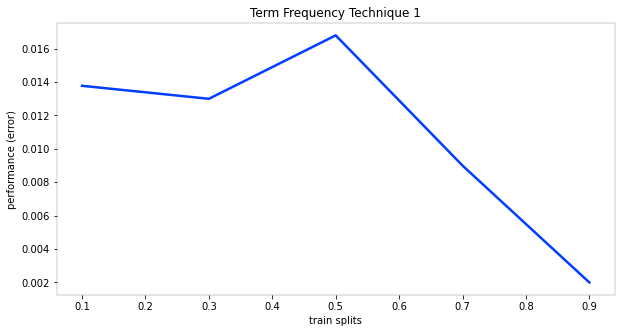

In [5]:
# technique 1/question 1
plot_performance(train_splits, technique_1, 
         'train splits', 'performance (error)', 'Term Frequency Technique 1')

/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/usr/local/lib/python3.6/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search fail

Text(0.5, 1.0, 'Term Frequency Technique 2')

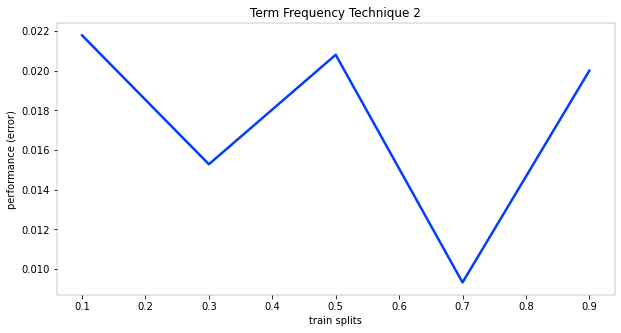

In [6]:
# technique 2/question 2
plot_performance(train_splits, technique_2, 
         'train splits', 'performance (error)', 'Term Frequency Technique 2')